# A-B Comparison of two models

In this notebook, we will see how to compare two models on multiple metrics.
This is especially useful if you have a complex problem and want to see if your new model is better than the old one.
Because there are many aspects to it, one usually has to make some trade-offs.
For example, you may have to convince the manager that the longer runtime is worth the better accuracy.

For this, we have some nice plots available.

In [105]:
import pandas as pd

data_a = pd.read_csv("data_a.csv").set_index("instance_id")

data_b = pd.read_csv("data_b.csv").set_index("instance_id")

In [106]:
import random


def perturb(x: float, mean_diff: float, std_diff: float) -> float:
    return x * (1 + random.normalvariate(mean_diff, std_diff))


xs = [4, 5, 6, 5, 3, 4, 9, 6, 4, 5, 6, 11, 14, 7]
data_a = pd.DataFrame(
    {
        "mean_delivery_time_to_customer": [10 * perturb(x, 0.0, 0.05) for x in xs],
        "max_delivery_time_to_customer": [10 * perturb(x, 0.0, 0.05) for x in xs],
        "mean_tour_length_for_drivers": [5 * perturb(x, 0.0, 0.05) for x in xs],
        "max_tour_length_for_drivers": [5 * perturb(x, 0.0, 0.05) for x in xs],
        "revenue": [100 * perturb(x, 0.0, 0.05) for x in xs],
        "satisfaction_score": [20 * perturb(x, 0.0, 0.05) for x in xs],
    }
)

data_b = pd.DataFrame(
    {
        "mean_delivery_time_to_customer": [10 * perturb(x, 0.02, 0.05) for x in xs],
        "max_delivery_time_to_customer": [10 * perturb(x, -0.05, 0.05) for x in xs],
        "mean_tour_length_for_drivers": [5 * perturb(x, 0.02, 0.05) for x in xs],
        "max_tour_length_for_drivers": [5 * perturb(x, -0.1, 0.05) for x in xs],
        "revenue": [100 * perturb(x, 0.0, 0.05) for x in xs],
        "satisfaction_score": [20 * perturb(x, 0.0, 0.05) for x in xs],
    }
)

In [107]:
data_a

,mean_delivery_time_to_customer,max_delivery_time_to_customer,mean_tour_length_for_drivers,max_tour_length_for_drivers,revenue,satisfaction_score
0,41.775921,38.737703,19.420308,19.708264,396.234118,73.085512
1,52.566656,50.925763,22.954239,23.341276,498.670263,109.927108
2,60.608153,54.719603,29.147965,30.223972,682.758864,116.881748
3,49.804616,53.627298,23.819391,22.391619,474.580366,104.788192
4,27.824314,28.031835,14.799174,14.884375,284.506279,58.069672
5,40.873040,42.726120,18.013157,20.620457,405.640065,72.655780
6,91.972036,96.520746,41.730086,44.827220,894.957442,159.826436
7,60.719948,57.775688,28.202984,31.649166,532.996865,126.555565
8,39.753765,38.834161,17.484611,19.463021,399.119255,85.005658
9,54.695465,50.052483,23.173550,28.634682,514.232511,107.171751


In [108]:
data_b

,mean_delivery_time_to_customer,max_delivery_time_to_customer,mean_tour_length_for_drivers,max_tour_length_for_drivers,revenue,satisfaction_score
0,37.993671,40.680941,21.596402,18.086581,354.221790,79.798217
1,54.298173,47.598764,25.476284,22.373187,468.260794,96.435825
2,56.991868,62.454999,32.035579,26.873526,617.032317,112.570734
3,53.621042,44.241569,26.745224,22.427849,479.807675,116.962335
4,29.487242,28.754687,15.688476,14.455288,316.946659,62.058894
5,41.559918,35.182062,20.961070,21.628449,427.167570,80.141356
6,88.954440,88.403732,45.852696,40.512465,826.056994,193.344447
7,58.989735,55.821778,33.153755,25.219734,587.408908,122.672611
8,38.539834,36.647051,18.955121,17.646262,393.506097,80.689333
9,48.917007,49.757448,25.450176,22.119765,505.381005,93.353291


In [109]:
data_b.columns

Index(['mean_delivery_time_to_customer', 'max_delivery_time_to_customer',
       'mean_tour_length_for_drivers', 'max_tour_length_for_drivers',
       'revenue', 'satisfaction_score'],
      dtype='object')

In [110]:
from scatter_with_performance_zones import plot_comparison_grid

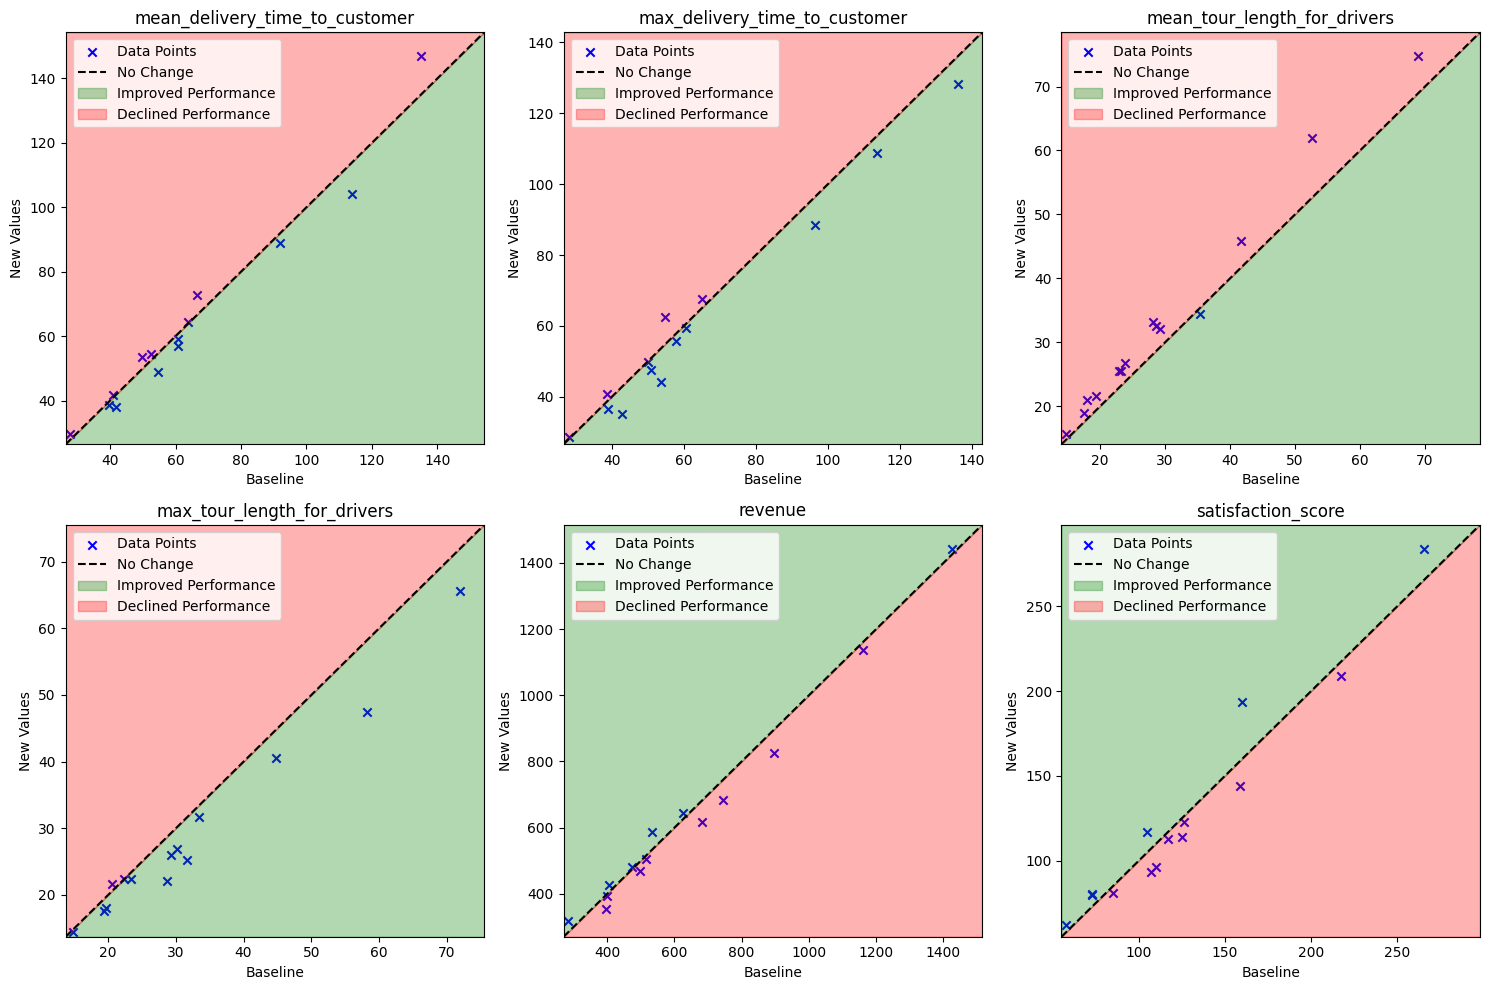

In [111]:
from matplotlib import pyplot as plt

plot_comparison_grid(
    data_a,
    data_b,
    [
        ("mean_delivery_time_to_customer", "min"),
        ("max_delivery_time_to_customer", "min"),
        ("mean_tour_length_for_drivers", "min"),
        ("max_tour_length_for_drivers", "min"),
        ("revenue", "max"),
        ("satisfaction_score", "max"),
    ],
    n_cols=3,
)
plt.show()